In [1]:
import pandas as pd
from explorer_lib import *
import seaborn as sns
import matplotlib.pyplot as plt 
import hvplot.pandas
from random import sample
import torch
from sklearn.metrics import pairwise
import numpy as np

%load_ext autoreload
%autoreload 2


In [2]:
colors_sns = sns.color_palette('colorblind')
colors_sns

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [3]:
fn_in = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/data/mohammed/df_mtb_smeg_umap.csv'
df_mtb_smeg = pd.read_csv(fn_in)

df_temp = df_mtb_smeg[df_mtb_smeg.annot_int >= 4]

# GLS correlations: 

In [4]:
norm = 0
df_interact, df_lfc, df_mtb_w_loc, dict_rvid_to_name = import_interact_lfc_uniprot(norm)

/home/ajinich/miniconda3/lib/python3.8/site-packages/openpyxl/styles/stylesheet.py:221: UserWarning: Workbook contains no default style, apply openpyxl's default
  warn("Workbook contains no default style, apply openpyxl's default")


In [5]:
df_interact.head(2)

lead_gene partner_gene   p_value_FDR
0    Rv0001       Rv0062  1.962568e-04
1    Rv0001       Rv0283  4.421194e-09

In [7]:
rvid_query = 'Rv0097' #'Rv1300' #'Rv2165c' 
list_rvid_NN1, list_rvid_NN2, list_rvid_NN3 = get_NN12(rvid_query, df_interact)
# list_rvid = sample(list_rvid_NN1, 10)
list_rvid = list_rvid_NN2.copy()
list_subset= []
# list_subset =  ['Rv1901'] # ['Rv3044']
len(list_rvid_NN1), len(list_rvid_NN2),len(list_rvid_NN3)

(6, 7, 9)

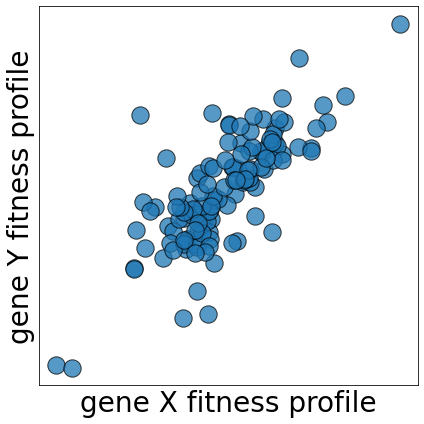

In [7]:
x_rvid = 'Rv0256c'
y_rvid = 'Rv1819c'
x = df_lfc[df_lfc.Rv_ID==x_rvid].values[0][1:]
y = df_lfc[df_lfc.Rv_ID==y_rvid].values[0][1:]

plt.figure(figsize=(6,6))
plt.scatter(x,y, s = 300, edgecolors='k', alpha = 0.75)
plt.xlabel('gene X fitness profile', fontsize = 28)
plt.ylabel('gene Y fitness profile', fontsize = 28)
plt.xticks([])
plt.yticks([])
plt.tight_layout()
path = '/home/ajinich/Desktop/cofitness_schematic.png'
plt.savefig(path,dpi = 300)

PDIM figure specific:

In [7]:
# rvid_query = 'Rv2936' # 'Rv2930'
# list_rvid_NN1, list_rvid_NN2, list_rvid_NN3 = get_NN12(rvid_query, df_interact)

# list_rvid += list_rvid_NN2
# list_rvid.sort()
# list_subset = list_rvid_NN2.copy()


In [8]:
# df_mtb_w_loc[df_mtb_w_loc.Rv_ID.isin(list_rvid)].sort_values(by = 'Rv_ID').head(1)

### [PENDING]: 

lower alpha value for scatter plots that are not significant


In [9]:
# list_rvid = list_rvid[-20:]

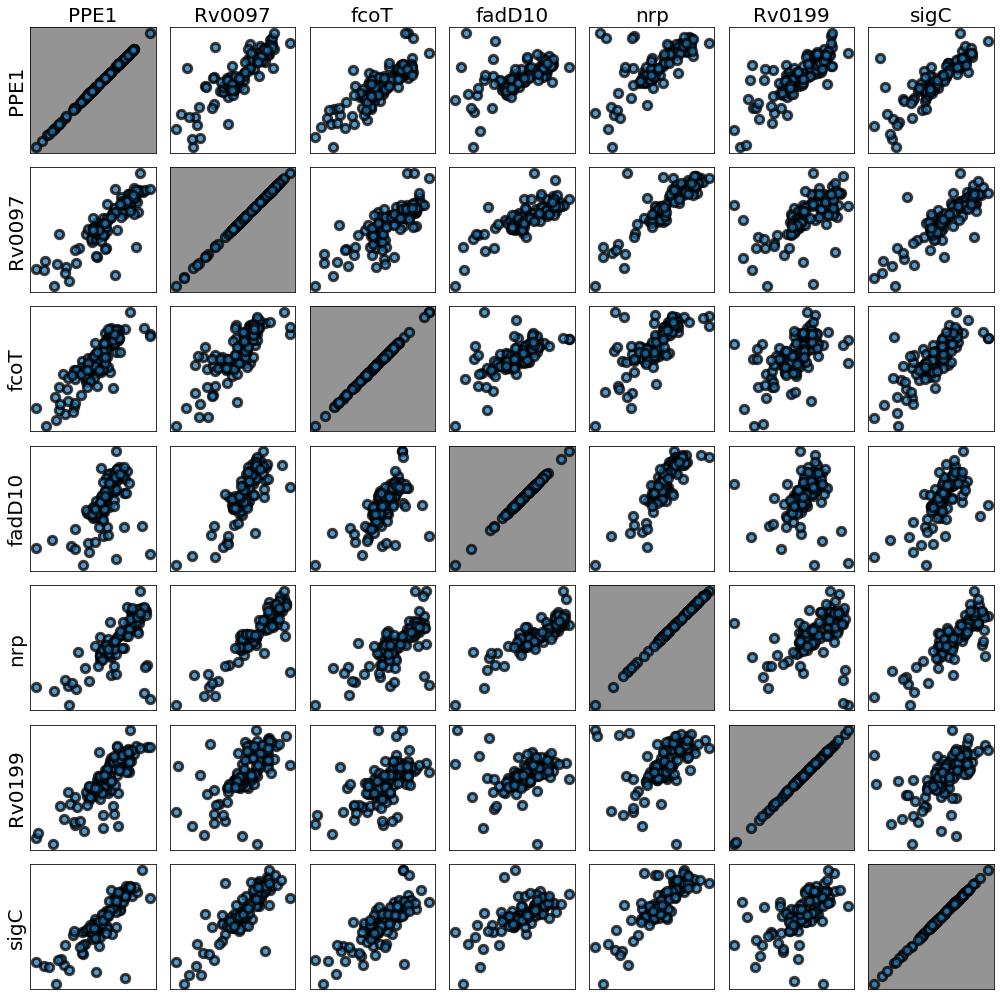

In [8]:
len_width = int(len(list_rvid)*2.0)
# correlation_tile_plot(df_lfc_basis_norm_invitro, list_rvid_NN1, list_rvid_NN1, (len_width,len_width), colors_sns, dict_rvid_to_name, list_subset = [], gene_names = True)
correlation_tile_plot(df_lfc, list_rvid, list_rvid, (len_width,len_width), colors_sns, dict_rvid_to_name, list_subset = list_subset, gene_names = True)
plt.tight_layout()

## Fingerprints in Clare's panel data: 

In [12]:
df_lfc_NN2 = df_lfc[df_lfc.Rv_ID.isin(list_rvid_NN2)].copy()
list_col_CC = [col for col in df_lfc_NN2.columns if 'in_vitro_vs' in col]
df_lfc_NN2_CC = df_lfc_NN2[['Rv_ID']+list_col_CC].copy()


In [13]:
df_lfc_NN2_CC

Rv_ID  in_vitro_vs_129s1.SvImJ  in_vitro_vs_A.J  in_vitro_vs_C57BL.6J  \
571    Rv0554                    -0.81            -1.23                 -1.24   
3024   Rv2928                    -0.44             0.01                 -0.70   
3026   Rv2930                    -0.15             0.10                 -0.95   
3027   Rv2931                    -0.26            -0.21                 -1.03   
3028   Rv2932                    -0.47            -0.50                 -1.23   
3029   Rv2933                    -0.20            -0.30                 -1.19   
3030   Rv2934                    -0.32            -0.57                 -1.15   
3031   Rv2935                    -0.19            -0.31                 -1.00   
3035   Rv2939                    -0.24            -0.33                 -1.29   
3036  Rv2940c                    -0.15            -0.31                 -0.98   
3037   Rv2941                    -0.14            -0.36                 -1.49   

      in_vitro_vs_CC001.Unc  in_vitro_vs_CC002.Unc  in_vitro_vs_CC003.Unc  \
571                   -1.49                  -1.15                  -1.62   
3024                  -0.20                  -0.28                  -1.35   
3026                  -1.12                  -1.10                  -1.77   
3027                  -1.07                  -1.08                  -1.94   
3028                  -1.24                  -1.25                  -2.00   
3029                  -1.34                  -1.36                  -1.91   
3030                  -1.41                  -1.25                  -1.92   
3031                  -0.89                  -1.19                  -1.67   
3035                  -1.00                  -1.00                  -1.94   
3036                  -1.21                  -1.08                  -1.83   
3037                  -1.23                  -1.22                  -1.88   

      in_vitro_vs_CC004.TauUnc  in_vitro_vs_CC005.TauUnc  \
571                      -1.56                     -1.04   
3024                     -1.51                     -0.60   
3026                     -1.83                     -0.85   
3027                     -2.03                     -1.09   
3028                     -2.30                     -1.30   
3029                     -2.16                     -1.16   
3030                     -2.05                     -1.08   
3031                     -1.93                     -0.90   
3035                     -2.19                     -1.04   
3036                     -2.02                     -0.97   
3037                     -2.19                     -1.12   

      in_vitro_vs_CC006.TauUnc  ...  in_vitro_vs_Cast.EiJ  in_vitro_vs_IFNG  \
571                      -1.22  ...                 -1.31              0.10   
3024                     -1.04  ...                 -0.64             -0.26   
3026                     -1.59  ...                 -1.60              0.20   
3027                     -1.74  ...                 -1.43              0.23   
3028                     -1.90  ...                 -1.69              0.09   
3029                     -1.98  ...                 -1.63             -0.14   
3030                     -2.02  ...                 -1.56             -0.18   
3031                     -1.80  ...                 -1.55              0.26   
3035                     -1.86  ...                 -1.79              0.28   
3036                     -1.79  ...                 -1.44             -0.00   
3037                     -1.99  ...                 -1.41              0.29   

      in_vitro_vs_NOD.ShiLtJ  in_vitro_vs_NOS  in_vitro_vs_NZO.H1LtJ  \
571                    -0.67            -1.59                  -1.01   
3024                   -0.68            -1.17                  -0.49   
3026                   -0.66            -0.53                  -1.41   
3027                   -0.45            -0.60                  -1.17   
3028                   -0.71            -0.86                  -1.67   
3029    

# Are there correlations within Clare's dataset?

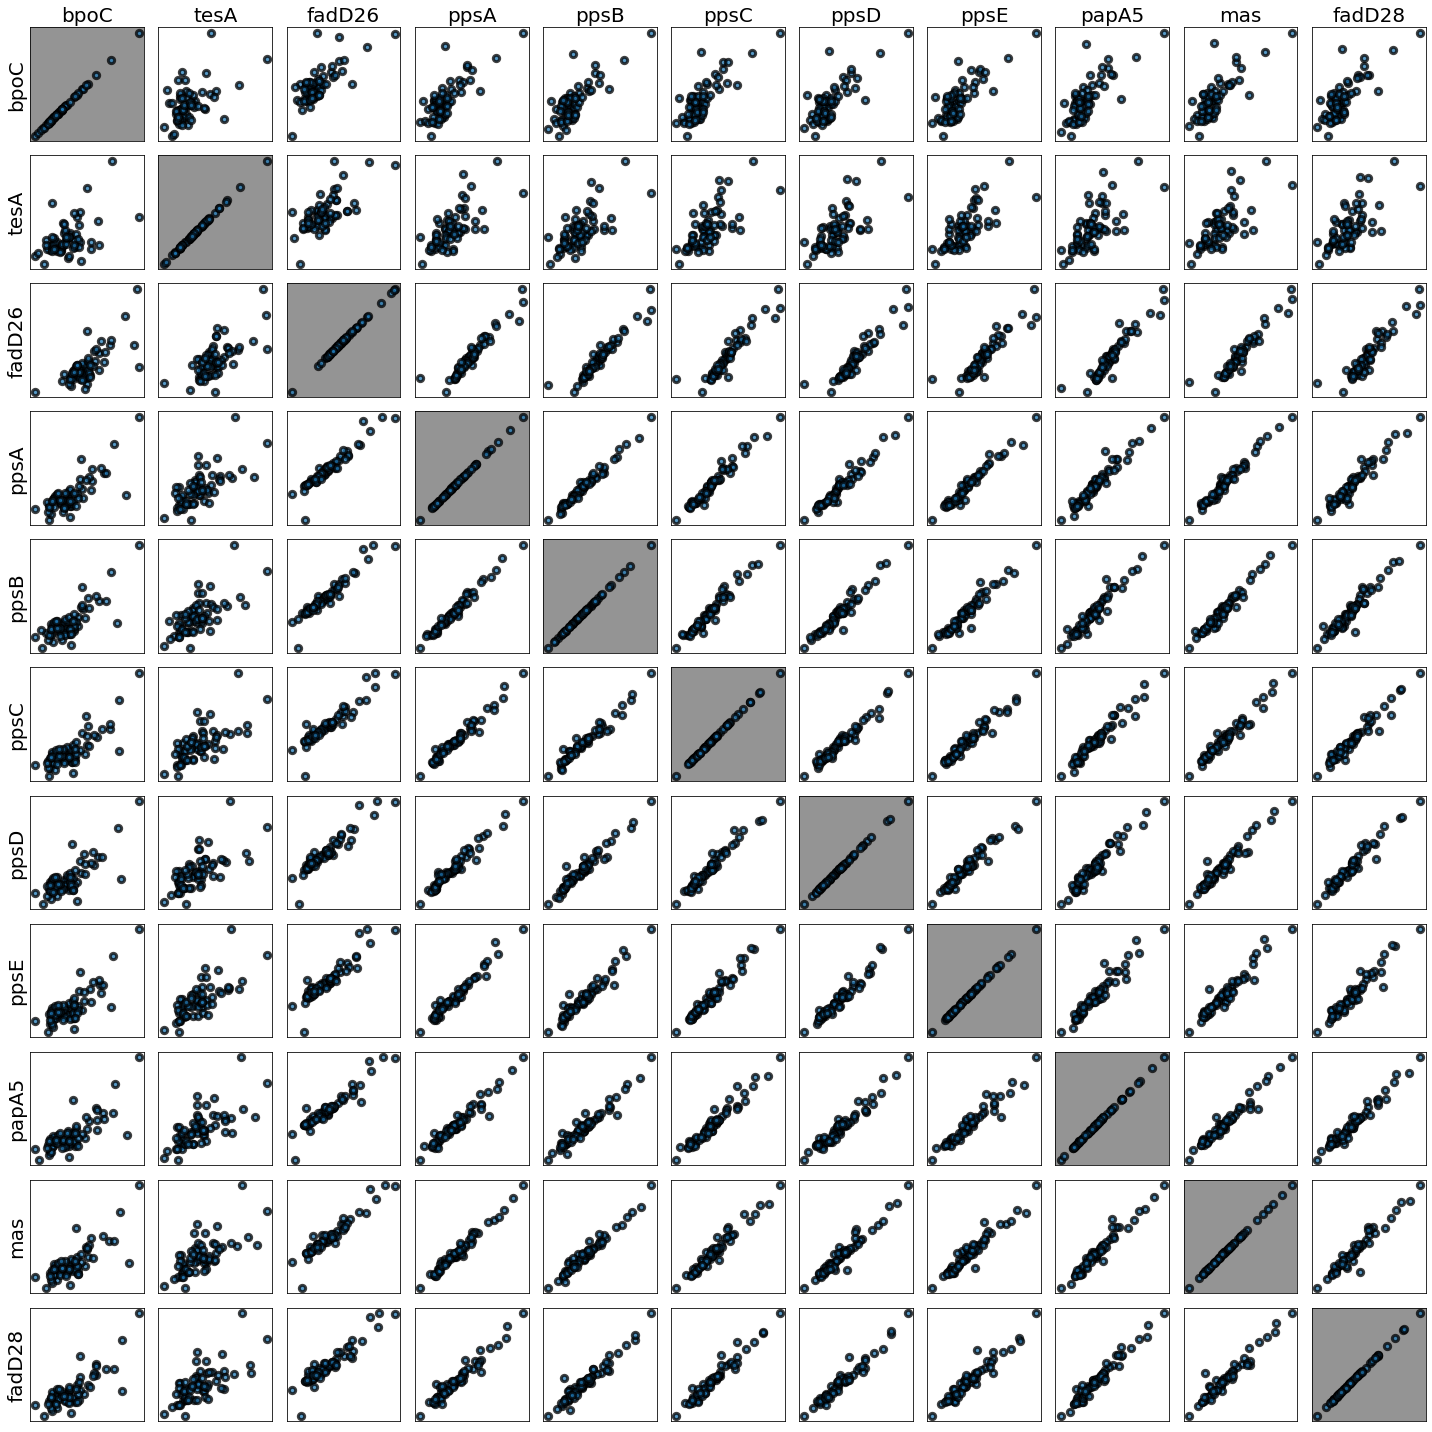

In [14]:
len_width = int(len(list_rvid)*2.0)
# correlation_tile_plot(df_lfc_basis_norm_invitro, list_rvid_NN1, list_rvid_NN1, (len_width,len_width), colors_sns, dict_rvid_to_name, list_subset = [], gene_names = True)
correlation_tile_plot(df_lfc_NN2_CC, list_rvid_NN2, list_rvid_NN2, (len_width,len_width), colors_sns, dict_rvid_to_name, list_subset = list_subset, gene_names = True)
plt.tight_layout()

### Manhattan style plot: 

In [73]:
list_gene_names = [dict_rvid_to_name[rvid] for rvid in list_rvid_NN2]
list_gene_names

['PPE2', 'Rv1314c', 'mutA', 'mutB', 'bacA', 'citE', 'miaB']

In [101]:
lfc_mean = list(df_lfc_NN2_CC[list_col_CC].median())
list_CC_sorted = [x for _,x in sorted(zip(lfc_mean,list_col_CC))]
lfc_mean.sort()

Text(0, 0.5, 'median log2-FC\n across 7 module genes')

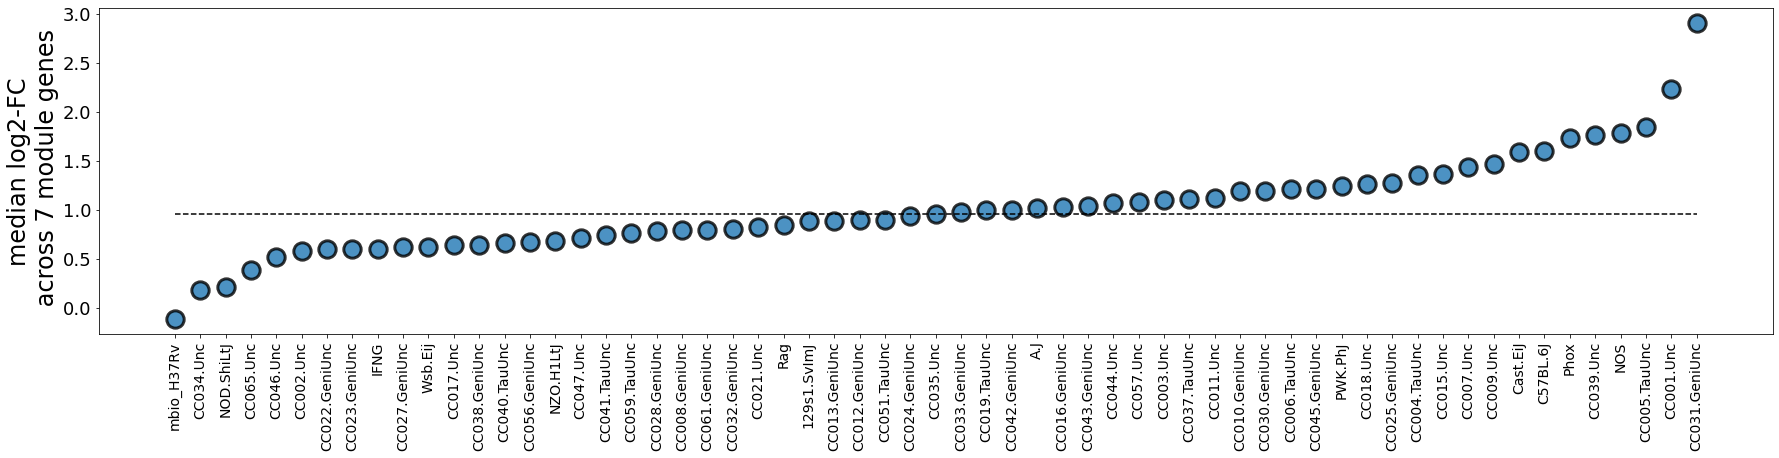

In [102]:
x = np.arange(0,len(y))
plt.figure(figsize = (30, 6))
plt.scatter(x, lfc_mean, s = 300, edgecolors='k', alpha=0.8, lw = 3)

y_mean = np.median(lfc_mean)
plt.plot(x, [y_mean]*len(x), 'k--')
list_CC_names = [CC.split('vs_')[1] for CC in list_CC_sorted]
xt = plt.xticks(x, list_CC_names, rotation = 90, fontsize = 14)
yt = plt.yticks(fontsize=18)
yl = plt.ylabel('median log2-FC\n across 7 module genes', fontsize = 24)

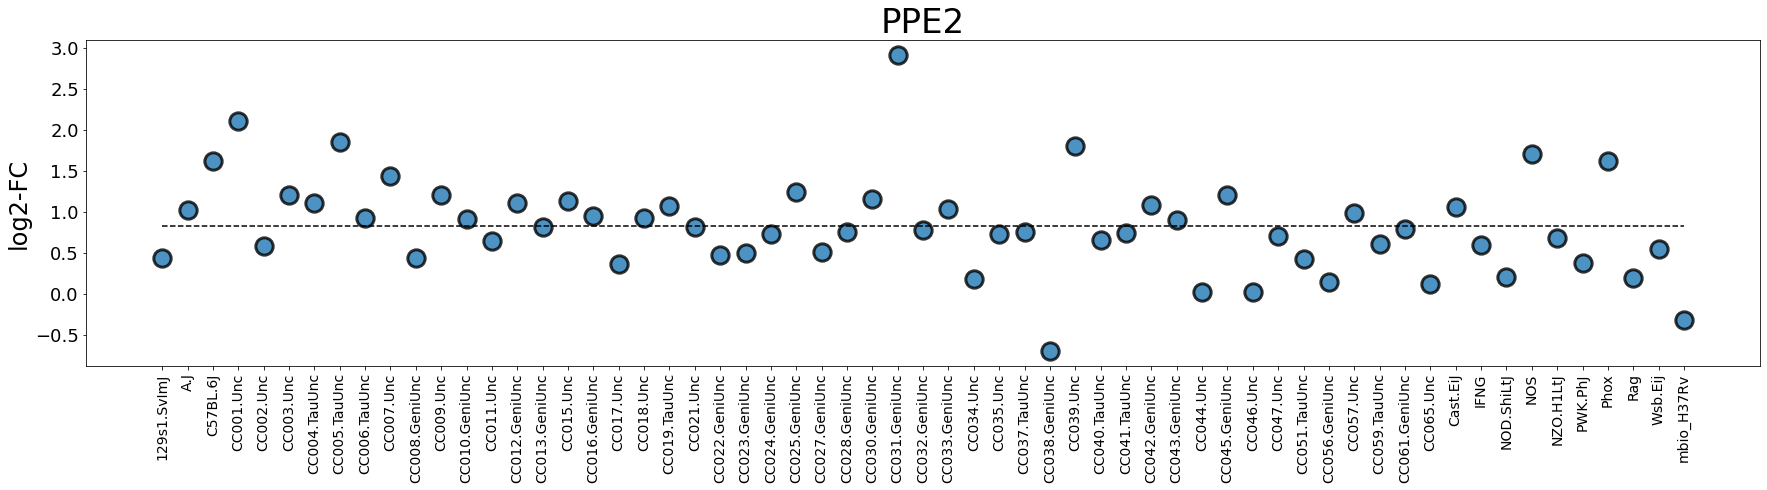

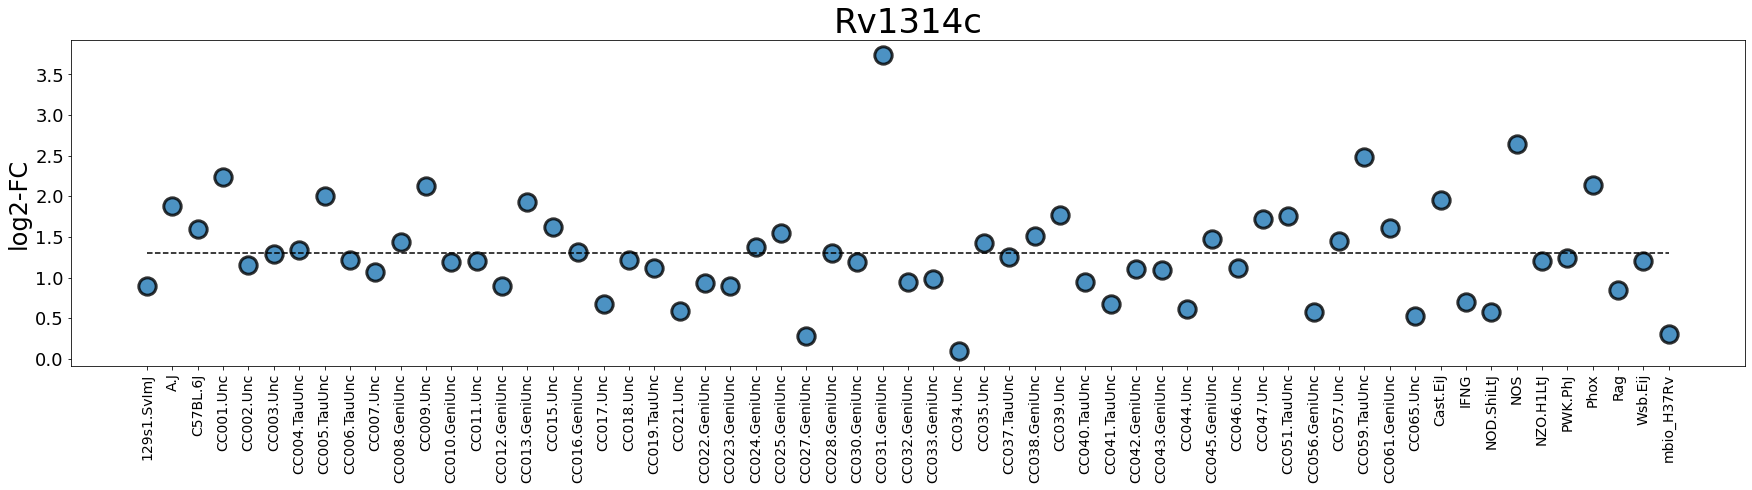

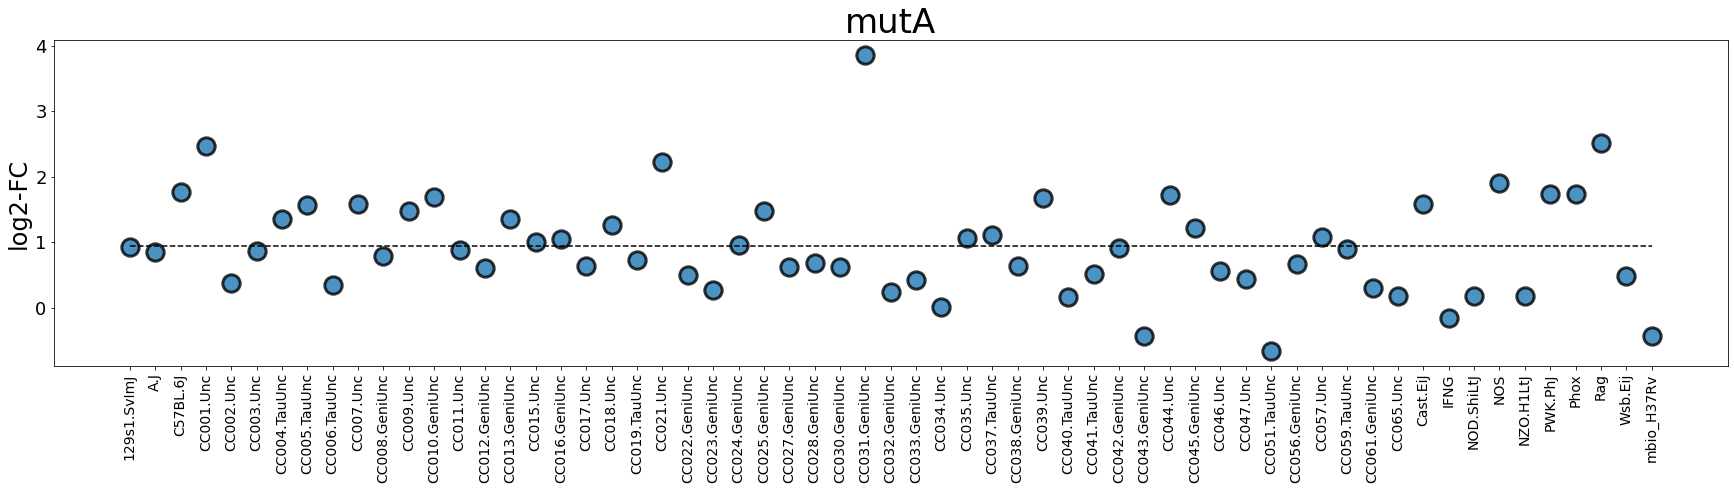

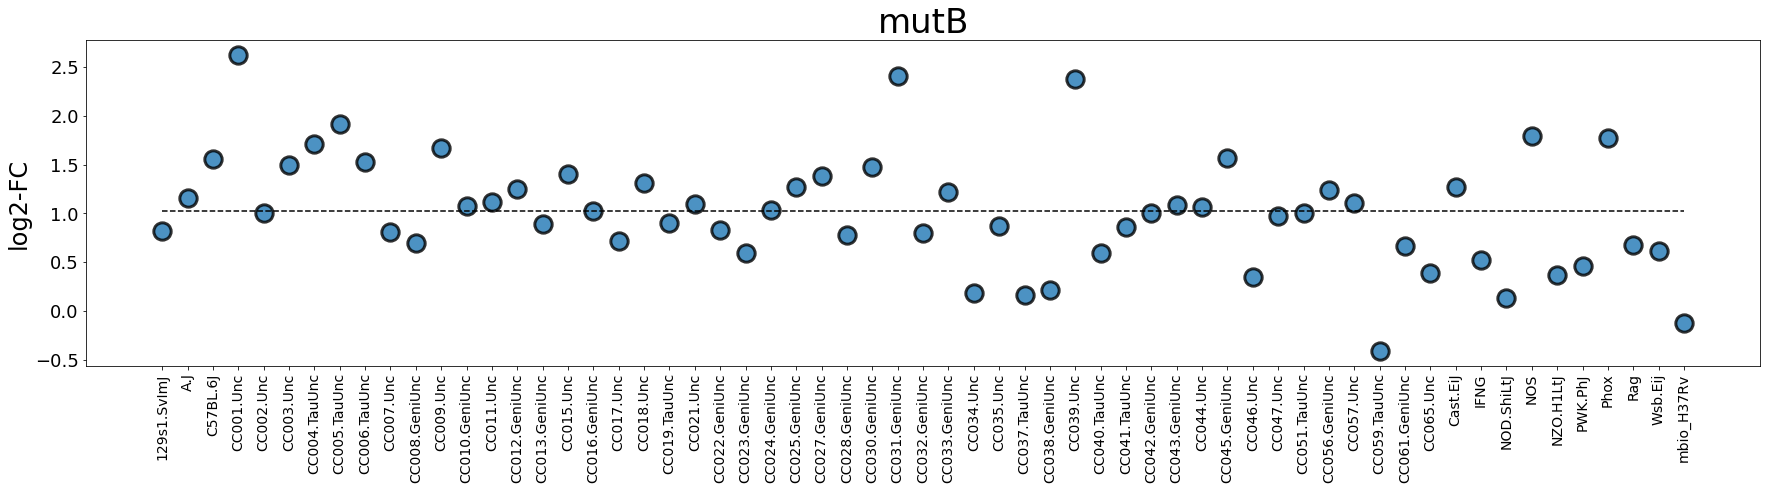

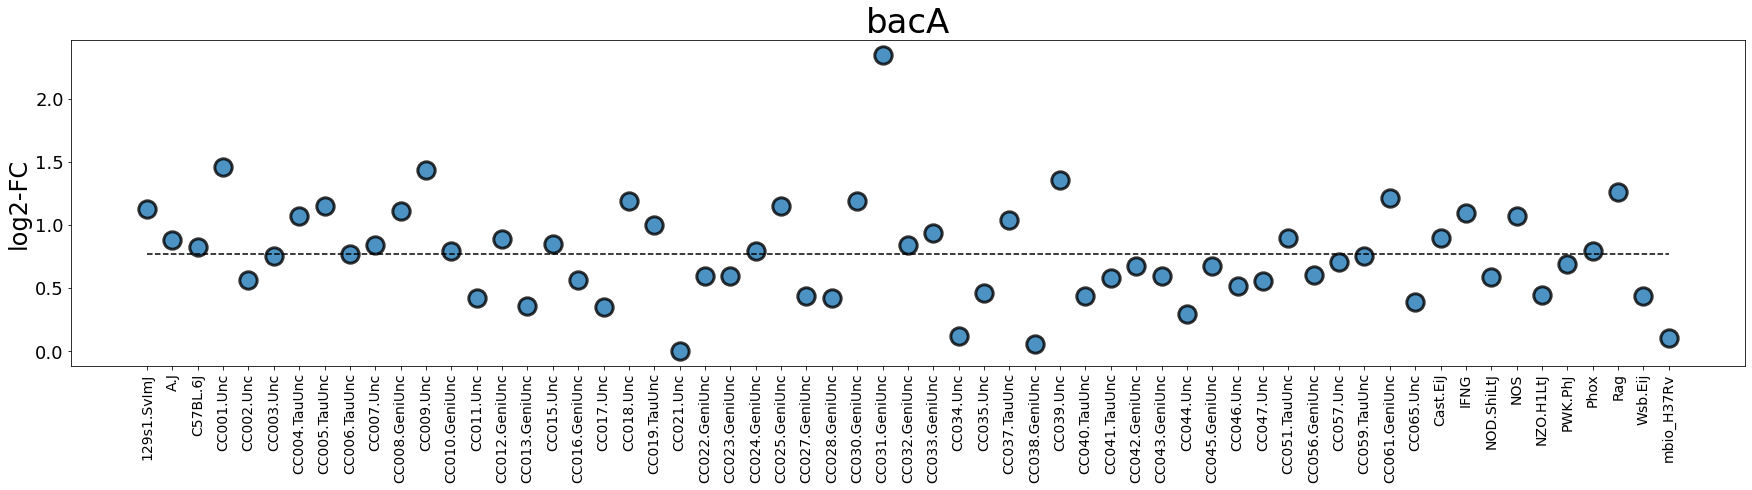

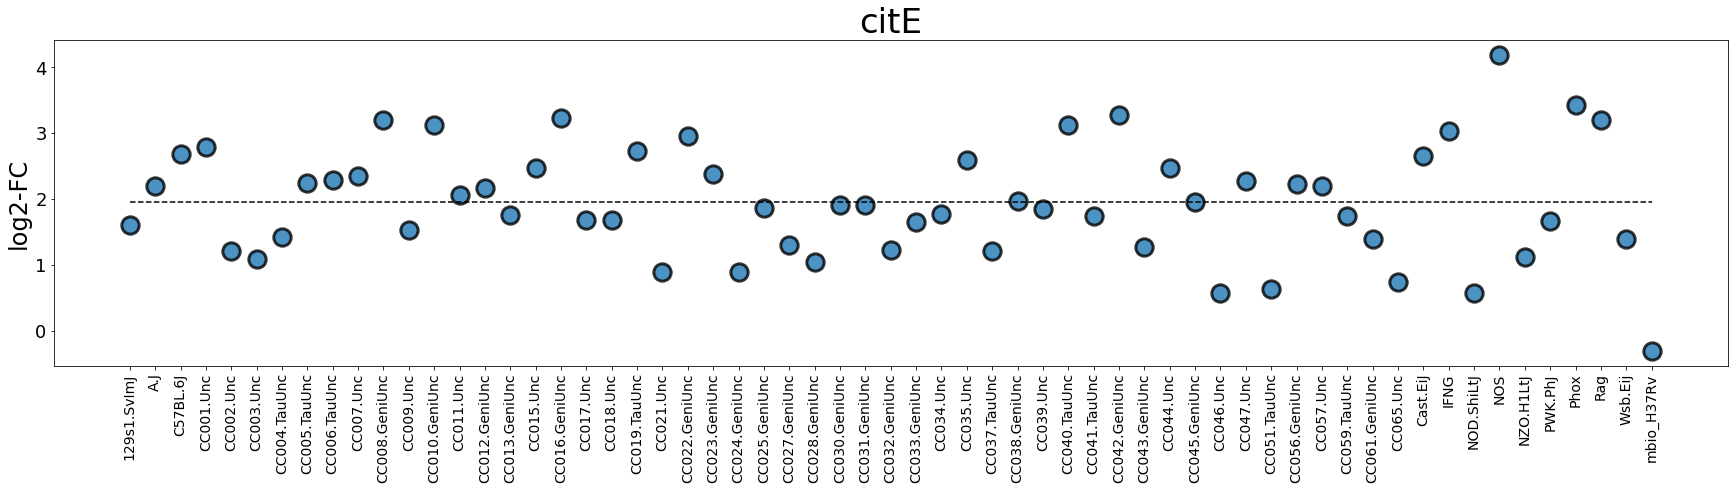

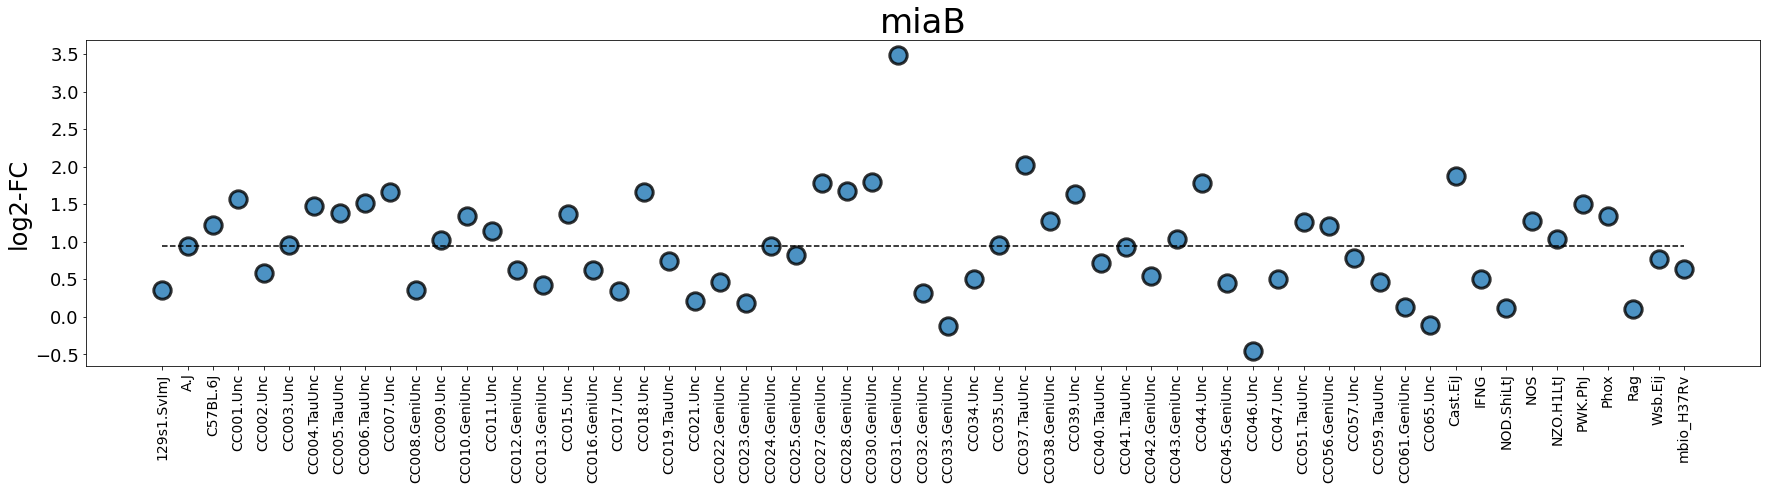

In [74]:
# gene = list_rvid_NN2[0]
counter = 0
for gene in list_rvid_NN2:

    df_lfc_NN2_CC_gene = df_lfc_NN2_CC[df_lfc_NN2_CC.Rv_ID==gene].copy()
    y = df_lfc_NN2_CC_gene[list_col_CC].to_numpy()[0]
    x = np.arange(0,len(y))
    plt.figure(figsize = (30, 6))
    plt.scatter(x, y, s = 300, edgecolors='k', alpha=0.8, lw = 3)
    y_mean = y.mean()
    plt.plot(x, [y_mean]*len(x), 'k--')
    list_CC_names = [CC.split('vs_')[1] for CC in list_col_CC]
    xt = plt.xticks(x, list_CC_names, rotation = 90, fontsize = 14)
    yt = plt.yticks(fontsize=18)
    plt.ylabel('log2-FC', fontsize = 24)
    gene_name = list_gene_names[counter]
    ttl = plt.title(gene_name, fontsize = 34)
    
    counter += 1

# ESM: 

In [13]:
if len(list_rvid) == 0:
    list_rvid = [rvid_query]
df_rvid = df_mtb_smeg[df_mtb_smeg.Rv_ID.isin(list_rvid)].copy()
df_rvid.sort_values(by = 'Annotation', ascending=False)

Entry    Entry name      Status  \
6957   P9WG77    THID_MYCTU    reviewed   
7084   O06409  O06409_MYCTU  unreviewed   
10124  O06283  O06283_MYCTU  unreviewed   

                                           Protein names  \
6957   Hydroxymethylpyrimidine/phosphomethylpyrimidin...   
7084                                   Conserved protein   
10124                         Hypothetical short protein   

                       Gene names  \
6957   thiD Rv0422c MTCY22G10.19c   
7084                      Rv0543c   
10124                     Rv3599c   

                                                Organism  Length  Annotation  \
6957   Mycobacterium tuberculosis (strain ATCC 25618 ...   265.0  3 out of 5   
7084   Mycobacterium tuberculosis (strain ATCC 25618 ...   100.0  1 out of 5   
10124  Mycobacterium tuberculosis (strain ATCC 25618 ...    27.0  1 out of 5   

                      Rhea ID          EC number  ...  \
6957   RHEA:23096; RHEA:19893  2.7.1.49; 2.7.4.7  ...   
7084                      NaN                NaN  ...   
10124                     NaN                NaN  ...   

                                                Sequence  \
6957   MTPPRVLSIAGSDSGGGAGIQADMRTMALLGVHACVAVTAVTVQNT...   
7084   MNRFLTSIVAWLRAGYPEGIPPTDSFAVLALLCRRLSHDEVKAVAN...   
10124                        MPASSLGTGSPAADRLDATHERRREVI   

                                           Function [CC]  \
6957   FUNCTION: Catalyzes the phosphorylation of hyd...   
7084                                                 NaN   
10124                                                NaN   

      Cross-reference (InterPro) annot_int organism    Rv_ID         u1  \
6957                         NaN         3      mtb  Rv0422c  12.843766   
7084                         NaN         1      mtb  Rv0543c  10.452130   
10124                        NaN         1      mtb  Rv3599c   8.287591   

             u2        u3  cluster_labels  
6957   3.589231  3.996835              42  
7084   0.288566  5.283569              75  
10124 -3.630723  5.638516              11  

[3 rows x 22 columns]

In [14]:
hv1 = df_mtb_smeg.hvplot.scatter(x="u1", y="u2", padding=0.05, width = 1500, height = 1200, size = 100, alpha = 0.7, hover_cols=["Rv_ID", "Gene names", "Entry", "Protein names", "Annotation", "Length"], line_color='k', c="organism")
hv2 = df_temp.hvplot.scatter(x="u1", y="u2", size = 400, alpha = 0.25, color = colors_sns[6], line_color = 'k', marker='s')
hv3 = df_rvid.hvplot.scatter(x='u1', y='u2', size = 600, alpha = 0.5, color='k')
(hv1*hv2*hv3)

:Overlay
   .Scatter.I   :Scatter   [u1]   (u2,organism,Rv_ID,Gene names,Entry,Protein names,Annotation,Length)
   .Scatter.II  :Scatter   [u1]   (u2)
   .Scatter.III :Scatter   [u1]   (u2)

# Interactive scatter plot:

In [71]:
list_hv = interactive_scatter_grid(df_lfc_NN2_CC, list_rvid)
for hv in list_hv:
    display(hv)

:NdLayout   [Rv_ID]
   :Scatter   [Rv0256c]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1314c]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1492]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1493]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1819c]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [value]   (value,screen)

# Cosine distance similarity:


In [ ]:
list_hv = interactive_scatter_grid(df_lfc, list_rvid)
for hv in list_hv:
    display(hv)

:NdLayout   [Rv_ID]
   :Scatter   [Rv0256c]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1314c]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1492]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1493]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [Rv1819c]   (value,screen)

:NdLayout   [Rv_ID]
   :Scatter   [value]   (value,screen)

# Cosine distance similarity:

Querying Mtb Msm protein:

In [16]:
X, df_mtb_smeg, list_entries = load_ESM_embeddings_and_df()

In [17]:
ind_query = df_mtb_smeg[df_mtb_smeg.Rv_ID == rvid_query].index[0]
# ind_query = df_mtb_smeg[df_mtb_smeg.Rv_ID == rvid_query].index[1]
perc_th = 0.5
df_th = get_similar_prots(X, df_mtb_smeg, ind_query, list_entries, perc_th)

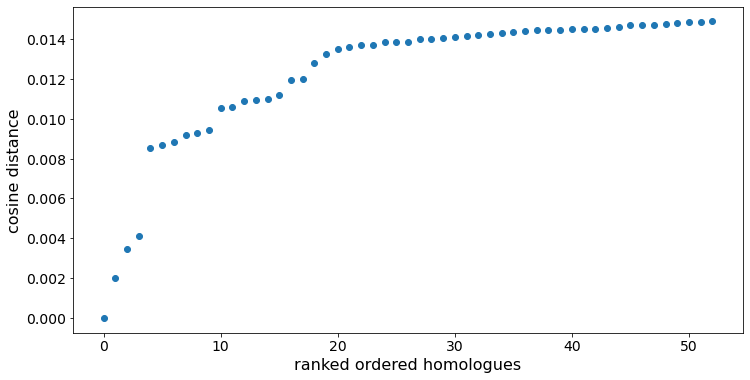

In [18]:
plt.figure(figsize = (12, 6))
plt.plot(df_th.d.values, 'o')
plt.xlabel('ranked ordered homologues', fontsize = 16)
yl = plt.ylabel('cosine distance', fontsize = 16)
xt = plt.xticks(fontsize = 14)
yt = plt.yticks(fontsize = 14)

In [21]:
df_th.head(10)[['Entry', 'Gene names', 'Annotation']]

Entry                  Gene names  Annotation
0  O06409                     Rv0543c  1 out of 5
1  A0QRC1                  MSMEG_1063  1 out of 5
2  A0QRC4                  MSMEG_1066  1 out of 5
3  I6YF16                     Rv3046c  1 out of 5
4  A0QNU0                  MSMEG_0162  1 out of 5
5  A0QYE2  ureA MSMEG_3627 MSMEI_3542  2 out of 5
6  A0QPF4                  MSMEG_0379  1 out of 5
7  O07756                      Rv1873  1 out of 5
8  A0QY92                  MSMEG_3577  1 out of 5
9  P9WFE7     ureA Rv1848 MTCY359.25c  3 out of 5

In [15]:
df_th[df_th.Organism.str.contains('H37Rv')].head(7)

Entry             d   Entry name    Status  \
0   P9WHG9 -1.192093e-07   RELA_MYCTU  reviewed   
2   P9WFW7  1.111269e-02    SYA_MYCTU  reviewed   
5   P9WFT5  1.228267e-02    SYT_MYCTU  reviewed   
7   P9WG47  1.262587e-02   GYRA_MYCTU  reviewed   
12  O53289  1.288235e-02  SERB2_MYCTU  reviewed   
13  P9WNU5  1.305276e-02   DPO1_MYCTU  reviewed   
14  P9WN79  1.317781e-02  GLPD2_MYCTU  reviewed   

                                        Protein names  \
0   Bifunctional (p)ppGpp synthase/hydrolase RelA ...   
2   Alanine--tRNA ligase (EC 6.1.1.7) (Alanyl-tRNA...   
5   Threonine--tRNA ligase (EC 6.1.1.3) (Threonyl-...   
7   DNA gyrase subunit A (EC 5.6.2.2) (Type IIA to...   
12  Phosphoserine phosphatase SerB2 (PSP) (PSPase)...   
13              DNA polymerase I (POL I) (EC 2.7.7.7)   
14  Glycerol-3-phosphate dehydrogenase 2 (EC 1.1.5.3)   

                               Gene names  \
0                 relA Rv2583c MTCY227.18   
2    alaS Rv2555c MTCY159.01 MTCYW318.01c   
5                thrS Rv2614c MTCY1A10.20   
7                 gyrA Rv0006 MTCY10H4.04   
12                          serB2 Rv3042c   
13                polA Rv1629 MTCY01B2.21   
14  glpD2 Rv3302c MTCI418A.04c MTV016.01c   

                                             Organism  Length  Annotation  \
0   Mycobacterium tuberculosis (strain ATCC 25618 ...   738.0  5 out of 5   
2   Mycobacterium tuberculosis (strain ATCC 25618 ...   904.0  3 out of 5   
5   Mycobacterium tuberculosis (strain ATCC 25618 ...   692.0  3 out of 5   
7   Mycobacterium tuberculosis (strain ATCC 25618 ...   838.0  5 out of 5   
12  Mycobacterium tuberculosis (strain ATCC 25618 ...   409.0  5 out of 5   
13  Mycobacterium tuberculosis (strain ATCC 25618 ...   904.0  4 out of 5   
14  Mycobacterium tuberculosis (strain ATCC 25618 ...   585.0  2 out of 5   

                                           Rhea ID  ...  \
0                           RHEA:14253; RHEA:22088  ...   
2                                       RHEA:12540  ...   
5                                       RHEA:24624  ...   
7                                                   ...   
12  RHEA:21208; RHEA:24873; RHEA:20629; RHEA:47004  ...   
13                                      RHEA:22508  ...   
14                                      RHEA:18977  ...   

                                             Sequence  \
0   MTAQRSTTNPVLEPLVAVHREIYPKADLSILQRAYEVADQRHASQL...   
2   MQTHEIRKRFLDHFVKAGHTEVPSASVILDDPNLLFVNAGMVQFVP...   
5   MSAPAQPAPGVDGGDPSQARIRVPAGTTAATAVGEAGLPRRGTPDA...   
7   MTDTTLPPDDSLDRIEPVDIEQEMQRSYIDYAMSVIVGRALPEVRD...   
12  MPAKVSVLITVTGMDQPGVTSALFEVLAQHGVELLNVEQVVIRGRL...   
13  MVTTASAPSEDRAKPTLMLLDGNSLAFRAFYALPAENFKTRGGLTT...   
14  MSNPIQAPDGGQGWPAAALGPAQRAVAWKRLGTEQFDVVVIGGGVV...   

                                        Function [CC]  \
0   FUNCTION: In eubacteria ppGpp (guanosine 3'-di...   
2   FUNCTION: Catalyzes the attachment of alanine ...   
5   FUNCTION: Catalyzes the attachment of threonin...   
7   FUNCTION: A type II topoisomerase that negativ...   
12  FUNCTION: Catalyzes the dephosphorylation of O...   
13  FUNCTION: In addition to polymerase activity, ...   
14                                                      

   Cross-reference (InterPro) annot_int organism    Rv_ID         u1  \
0                                     5      mtb  Rv2583c  13.172074   
2                                     3      mtb  Rv2555c  13.248959   
5                                     3      mtb  Rv2614c  13.327928   
7                                     5      mtb   Rv0006  13.250721   
12                                    5      mtb  Rv3042c  12.286264   
13                                    4      mtb   Rv1629  13.085185   
14                                    2      mtb  Rv3302c  11.783493   

          u2        u3  cluster_labels  
0   1.919902  4.598116              47  
2   1.799713  4.385769               0  
5   1.770806  4.420364              51  
7   1.765622  4.527263           

In [16]:
df_mtb_ESM = df_th[df_th.Organism.str.contains('H37Rv')].copy()
df_msm_ESM = df_th[df_th.Organism.str.contains('smeg')].copy()
df_mtb_ESM.reset_index(inplace=True, drop=True)
df_msm_ESM.reset_index(inplace=True, drop=True)

In [21]:
df_msm_ESM

Entry         d    Entry name      Status  \
0   A0QWJ6  0.000318  A0QWJ6_MYCS2  unreviewed   
1   A0QWQ4  0.011255     SYA_MYCS2    reviewed   
2   A0QW71  0.011688  A0QW71_MYCS2  unreviewed   
3   A0QWG2  0.012620     SYT_MYCS2    reviewed   
4   A0QRA0  0.012719  A0QRA0_MYCS2  unreviewed   
5   P48354  0.012738    GYRA_MYCS2    reviewed   
6   A0QT70  0.012790  A0QT70_MYCS2  unreviewed   
7   A0QYZ2  0.012810  A0QYZ2_MYCS2  unreviewed   
8   A0QPA9  0.013540  A0QPA9_MYCS2  unreviewed   
9   A0QYX0  0.013642  A0QYX0_MYCS2  unreviewed   
10  A0QPK2  0.013700  A0QPK2_MYCS2  unreviewed   
11  A0R241  0.013844  A0R241_MYCS2  unreviewed   
12  A0R015  0.013896    MURC_MYCS2    reviewed   
13  A0R730  0.013978  A0R730_MYCS2  unreviewed   
14  A0R221  0.014037  A0R221_MYCS2  unreviewed   
15  A0QWN3  0.014070   SYDND_MYCS2    reviewed   
16  A0QVT2  0.014079     RNJ_MYCS2    reviewed   
17  A0R155  0.014106  A0R155_MYCS2  unreviewed   
18  A0R388  0.014147  A0R388_MYCS2  unreviewed   
19  A0R3E5  0.014168  A0R3E5_MYCS2  unreviewed   
20  A0QQK0  0.014170  A0QQK0_MYCS2  unreviewed   
21  A0QRT3  0.014186  A0QRT3_MYCS2  unreviewed   
22  A0QUW7  0.014242    DNLJ_MYCS2    reviewed   
23  A0R090  0.014271  A0R090_MYCS2  unreviewed   
24  A0R784  0.014292  A0R784_MYCS2  unreviewed   
25  A0QWV0  0.014301  A0QWV0_MYCS2  unreviewed   
26  A0QSL0  0.014305  A0QSL0_MYCS2  unreviewed   

                                        Protein names  \
0                  GTP pyrophosphokinase (EC 2.7.6.5)   
1   Alanine--tRNA ligase (EC 6.1.1.7) (Alanyl-tRNA...   
2                   Transcriptional accessory protein   
3   Threonine--tRNA ligase (EC 6.1.1.3) (Threonyl-...   
4       O-phosphoserine phosphohydrolase (EC 3.1.3.3)   
5                   DNA gyrase subunit A (EC 5.6.2.2)   
6     Glycerol-3-phosphate dehydrogenase (EC 1.1.5.3)   
7                       DNA polymerase I (EC 2.7.7.7)   
8   Biotin carboxyl carrier protein (EC 6.3.4.14) ...   
9   UvrABC system protein B (Protein UvrB) (Excinu...   
10  Assimilatory sulfite reductase (ferredoxin) (E...   
11  Multifunctional fusion protein [Includes: Sulf...   
12  UDP-N-acetylmuramate--L-alanine ligase (EC 6.3...   
13    Glycerol-3-phosphate dehydrogenase (EC 1.1.5.3)   
14              Homoserine dehydrogenase (EC 1.1.1.3)   
15  Aspartate--tRNA(Asp/Asn) ligase (EC 6.1.1.23) ...   
16              Ribonuclease J (RNase J) (EC 3.1.-.-)   
17  Valine--tRNA ligase (EC 6.1.1.9) (Valyl-tRNA s...   
18              Metallo-beta-lactamase family protein   
19  RNA polymerase sigma-70 factor, TIGR02957 fami...   
20  Phosphate acetyltransferase (EC 2.3.1.8) (Phos...   
21                  DNA gyrase subunit B (EC 5.6.2.2)   
22  DNA ligase A (EC 6.5.1.2) (Polydeoxyribonucleo...   
23                                  Acyl-CoA synthase   
24  RNA polymerase sigma factor, sigma-70 family p...   
25  Riboflavin biosynthesis protein RibBA [Include...   
26                              Thioredoxin reductase   

                    Gene names  \
0              relA MSMEG_2965   
1   alaS MSMEG_3025 MSMEI_2950   
2                   MSMEG_2839   
3   thrS MSMEG_2931 MSMEI_2857   
4   serB MSMEG_1041 MSMEG_2321   
5   gyrA MSMEG_0006 MSMEI_0008   
6                   MSMEG_1736   
7              polA MSMEG_3839   
8                   MSMEG_0334   
9              uvrB MSMEG_3816   
10             nirB MSMEG_0427   
11  cysNC cysC cysN MSMEG_4978   
12  murC MSMEG_4226 MSMEI_4126   
13                  MSMEG_6761   
14                  MSMEG_4957   
15  aspS MSMEG_3003 MSMEI_2928   
16   rnj MSMEG_2685 MSMEI_2620   
17             valS MSMEG_4630   
18                  MSMEG_5385   
19                  MSMEG_5444   
20              pta MSMEG_0783   
21             gyrB MSMEG_1229   
22  ligA MSMEG_2362 MSMEI_2302   
23                  MSMEG_4301   
24                  MSMEG_6817   
25            ribBA MSMEG_3072   
26                  MSMEG_1516   

                                             Organism 

## Other: 

### Querying protein against Sakila's 10 proteomes: 

In [276]:
X_10, df_10, list_entries_10 = load_ESM_embeddings_and_df_10_prots()

In [277]:
X_10.shape, df_10.shape

((40857, 1280), (40857, 11))

In [283]:
ind_query = df_10[df_10.Rv_ID == rvid_query].index[0]
# ind_query = df_mtb_smeg[df_mtb_smeg.Rv_ID == rvid_query].index[1]
perc_th = 0.5
df_th_10 = get_similar_prots(X_10, df_10, ind_query, list_entries_10, perc_th)

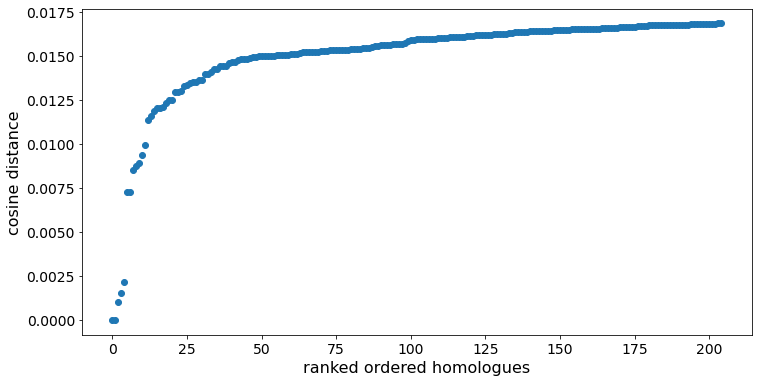

In [285]:
plt.figure(figsize = (12, 6))
plt.plot(df_th_10.d.values, 'o')
plt.xlabel('ranked ordered homologues', fontsize = 16)
yl = plt.ylabel('cosine distance', fontsize = 16)
xt = plt.xticks(fontsize = 14)
yt = plt.yticks(fontsize = 14)

In [288]:
d_th = 0.015
df_th_10[df_th_10.d<= d_th]

Entry             d        Entry name      Status  \
0   A0A1R3Y4V9  4.172325e-07  A0A1R3Y4V9_MYCBO  unreviewed   
1       O53291  4.172325e-07      O53291_MYCTU  unreviewed   
2       Q9CBQ4  1.012385e-03      Q9CBQ4_MYCLE  unreviewed   
3       X8B9Y7  1.508176e-03      X8B9Y7_MYCAV  unreviewed   
4       A0QR99  2.138078e-03      A0QR99_MYCS2  unreviewed   
5   A0A679LB80  7.263541e-03  A0A679LB80_MYCBO  unreviewed   
6       L7N6B2  7.263541e-03      L7N6B2_MYCTU  unreviewed   
7       A0QPL3  8.519948e-03      A0QPL3_MYCS2  unreviewed   
8       X8BBC0  8.757710e-03      X8BBC0_MYCAV  unreviewed   
9       A0QNF2  8.904159e-03      A0QNF2_MYCS2  unreviewed   
10      A0R548  9.388804e-03      A0R548_MYCS2  unreviewed   
11      A0R0Z4  9.919107e-03      A0R0Z4_MYCS2  unreviewed   
12      Q9CCV9  1.137632e-02      Q9CCV9_MYCLE  unreviewed   
13      A0R0Z3  1.156801e-02      A0R0Z3_MYCS2  unreviewed   
14      P72610  1.187617e-02      P72610_SYNY3  unreviewed   
15      O06155  1.203024e-02      O06155_MYCTU  unreviewed   
16  A0A1R3Y4M3  1.205909e-02  A0A1R3Y4M3_MYCBO  unreviewed   
17      X8B813  1.210034e-02      X8B813_MYCAV  unreviewed   
18      P72611  1.234424e-02      P72611_SYNY3  unreviewed   
19      Q9CC99  1.246154e-02      Q9CC99_MYCLE  unreviewed   
20      Q9CBI7  1.249856e-02      Q9CBI7_MYCLE  unreviewed   
21  A0A1R3XXS3  1.296198e-02  A0A1R3XXS3_MYCBO  unreviewed   
22      Q5FAL1  1.296216e-02      Q5FAL1_NEIG1  unreviewed   
23      O50459  1.300108e-02      O50459_MYCTU  unreviewed   
24      Q7AQ63  1.328421e-02      Q7AQ63_MYCLE  unreviewed   
25      A0R2B6  1.334834e-02      A0R2B6_MYCS2  unreviewed   
26      A0R570  1.345003e-02      A0R570_MYCS2  unreviewed   
27      P71969  1.348674e-02      P71969_MYCTU  unreviewed   
28      A0QRT6  1.349682e-02      A0QRT6_MYCS2  unreviewed   
29  A0A1R3Y1V3  1.361936e-02  A0A1R3Y1V3_MYCBO  unreviewed   
30      A0QNZ8  1.365203e-02      A0QNZ8_MYCS2  unreviewed   
31      X8AYA3  1.395065e-02      X8AYA3_MYCAV  unreviewed   
32      A0QW29  1.397300e-02      A0QW29_MYCS2  unreviewed   
33      Q50043  1.405609e-02      Q50043_MYCLE  unreviewed   
34      A0QSS9  1.425338e-02      A0QSS9_MYCS2  unreviewed   
35      Q9CBE8  1.425380e-02      Q9CBE8_MYCLE  unreviewed   
36      A0QNN5  1.439786e-02      A0QNN5_MYCS2  unreviewed   
37      X8B4A2  1.441258e-02      X8B4A2_MYCAV  unreviewed   
38      P72593  1.443130e-02      P72593_SYNY3  unreviewed   
39      X8B1S2  1.457697e-02      X8B1S2_MYCAV  unreviewed   
40      P95291  1.463419e-02      P95291_MYCTU  unreviewed   
41  A0A1R3XZQ7  1.463419e-02  A0A1R3XZQ7_MYCBO  unreviewed   
42      A0R117  1.475739e-02      A0R117_MYCS2  unreviewed   
43      X8B623  1.482910e-02      X8B623_MYCAV  unreviewed   
44      P65371  1.484364e-02       MMPL7_MYCBO    reviewed   
45      P9WJU7  1.484364e-02       MMPL7_MYCTU    reviewed   
46      A0QSS7  1.486999e-02      A0QSS7_MYCS2  unreviewed   
47      Q9CBN6  1.493955e-02      Q9CBN6_MYCLE  unreviewed   
48      X8BC86  1.494229e-02      X8BC86_MYCAV  unreviewed   
49  A0A1R3Y0D3  1.495981e-02  A0A1R3Y0D3_MYCBO  unreviewed   
50      O06237  1.495981e-02      O06237_MYCTU  unreviewed   
51      I6XYM2  1.499331e-02      I6XYM2_MYCTU  unreviewed   
52  A0A1R3XZ07  1.499331e-02  A0A1R3XZ07_MYCBO  unreviewed   

                                        Protein names  \
0   PROBABLE FEIII-DICITRATE-BINDING PERIPLASMIC L...   
1   Probable FEIII-dicitrate-binding periplasmic l...   
2    Putative FeIII-dicitrate transporter lipoprotein   
3                  Periplasmic binding family protein   
4                         Periplasmic binding protein   
5     PROBABLE PERIPLASMIC IRON-TRANSPORT LIPOPROTEIN   
6     Probable periplasmic iron-transport lipoprotein   
7                         Periplasmic binding protein   
8                  Periplasmic binding family protein   
9                         Periplasmic binding protein   
10                               

#### Querying E. coli (other) protein against Mtb / M. smeg

In [ ]:
list_entries_other = ['P0A778']

path_rep = '/home/ajinich/Dropbox/KyuRhee/unknown_function/unknown_redox/data/mohammed/sakila_ESM/TotalProteomes/'

Xs_list = []
list_err = []

for entry in list_entries_other:
    fn_full = os.path.join(path_rep, entry+'.pt')
    try:
        embs = torch.load(fn_full)
        Xs_list.append(embs['mean_representations'][EMB_LAYER])
    except:
        list_err.append(entry)
X_other = torch.stack(Xs_list, dim=0).numpy()
x_test = X_other.copy()